In [1]:
%matplotlib inline
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [2]:
def rotate(theta):
    theta = theta  * np.pi / 180
    r = np.array([np.cos(theta), - np.sin(theta), np.sin(theta), np.cos(theta)]).reshape(2, 2)
    return r

In [12]:
x = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]], size = 360)

In [13]:
y0 = np.array([4, 0]).reshape(2, 1)
y = np.array([rotate(theta).dot(y0) + np.random.randn(2).reshape(2, 1)/2 for theta in range(360)]).squeeze()
# y = np.random.multivariate_normal(mean = [10, 0], cov = [[1, 0], [0, 1]], size = 100)

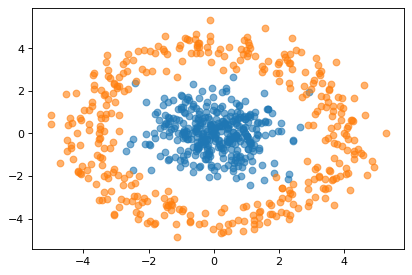

In [14]:
plt.figure(dpi = 80)
plt.scatter(x[:, 0], x[:, 1], alpha = 0.6)
plt.scatter(y[:, 0], y[:, 1], alpha = 0.6)

In [15]:
class dataSet(Dataset):
    """数据集"""
    
    def __init__(self, classA, classB, transform = None):
        self.data = torch.tensor(np.vstack((classA, classB)), dtype = torch.float)
        self.label = torch.cat((torch.zeros(len(classA), 1), torch.ones(len(classB), 1)))
        self.sample = torch.cat((self.data, self.label), 1)
    
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
        return self.sample[idx] # [x, y, label]

Data = dataSet(x, y)
print(len(Data))
print(Data[:2])

720
tensor([[-0.9215,  0.1700,  0.0000],
        [-2.1150, -0.5063,  0.0000]])


In [16]:
class LR(nn.Module):
    def __init__(self):
        super(LR, self).__init__()
        self.fc = nn.Linear(2, 5)
        self.fc1 = nn.Linear(5, 2)
        
    def forward(self, x):
        out = F.elu(self.fc(x))
        out = self.fc1(out)
        # out = torch.softmax(self.fc1(out), dim = 1)
        return out

In [17]:
def visualization(net, x, y):
    a = np.linspace(-5, 5, 1000)
    b = np.linspace(-5, 5, 1000)
    X, Y = torch.tensor(np.meshgrid(a, b))
    point = torch.cat((X.unsqueeze(dim = 2), Y.unsqueeze(dim = 2)), dim = 2).reshape(-1, 2).float()
    out = net(point)
    val = (out[:, 1] > out[:, 0]) .reshape(1000, 1000)
    # val = (out > 0.5).reshape(1000, 1000)
    plt.scatter(x[:, 0], x[:, 1], alpha = 0.6)
    plt.scatter(y[:, 0], y[:, 1], alpha = 0.6)
    plt.contour(np.array(X), np.array(Y), val, colors = 'r' , alpha = 0.3)
    plt.pause(0.001)
    # display.clear_output(wait=True)

In [18]:
dataLoader = DataLoader(Data, batch_size = 4)
criterion = nn.CrossEntropyLoss()

tensor(0.4090, grad_fn=<NllLossBackward>)
tensor(0.2490, grad_fn=<NllLossBackward>)
tensor(0.0893, grad_fn=<NllLossBackward>)
tensor(0.0475, grad_fn=<NllLossBackward>)
tensor(0.0342, grad_fn=<NllLossBackward>)
tensor(0.0285, grad_fn=<NllLossBackward>)
tensor(0.0251, grad_fn=<NllLossBackward>)
tensor(0.0227, grad_fn=<NllLossBackward>)
tensor(0.0209, grad_fn=<NllLossBackward>)
tensor(0.0195, grad_fn=<NllLossBackward>)
tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.0170, grad_fn=<NllLossBackward>)
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor(0.0150, grad_fn=<NllLossBackward>)
tensor(0.0141, grad_fn=<NllLossBackward>)
tensor(0.0132, grad_fn=<NllLossBackward>)
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor(0.0117, grad_fn=<NllLossBackward>)
tensor(0.0111, grad_fn=<NllLossBackward>)
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor(0.0098, grad_fn=<NllLossBackward>)
tensor(0.0092, grad_fn=<NllLossBackward>)
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor(0.0082, grad_fn=<NllLossBac

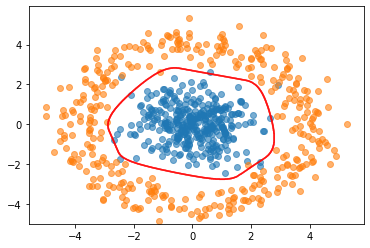

In [19]:
epoches = 300
net = LR()
# optim = torch.optim.Adam(net.parameters(), weight_decay = 0.001)
optim = torch.optim.Adam(net.parameters())
for i in range(epoches):
    for idx, batch in enumerate(dataLoader):
        data = batch[:, :2]
        label = batch[:, 2]
        yhat = net(data)
        # print(yhat.shape, label.shape)
        loss = criterion(yhat, label.long())
        optim.zero_grad()
        loss.backward()
        optim.step()
    if i % 10 == 0:
        print(loss)
visualization(net, x, y)
   

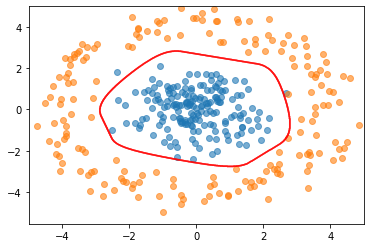

In [21]:
x_test = np.random.multivariate_normal(mean = [0, 0], cov = [[1, 0], [0, 1]], size = 180)
y_test = np.array([rotate(2 * theta).dot(y0) + np.random.randn(2).reshape(2, 1)/2 for theta in range(180)]).squeeze()
visualization(net, x_test, y_test)